# "Restaurant Information: Exploring, Analyzing, and Modeling Dining Experiences"

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# LEVEL 1

## TASK 1 - Data Exploration and Preprocessing

- Explore the dataset and identify the number of rows and columns.
- Check for missing values in each column andhandle them accordingly.
- Perform data type conversion if necessary.
- Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [38]:
# Assuming your data is stored in a CSV file named 'restaurants_data.csv'
file_path = r'D:\PROJECTS\Cognifyz Data Science Intern 22 Jan-22 Feb\Dataset .csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)


### DISPLAY ROWS and COLUMNS

In [39]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Display the result
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 9551 rows and 21 columns.


In [40]:
################################################################################
missing_values= df.isnull().sum()
# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Handle missing values (replace NaN values, drop rows/columns, etc.)
# Example: Replace missing values with the mean of the column
df.fillna(df.mean(numeric_only=True), inplace=True)

# Check again for missing values after handling
missing_values_after_handling = df.isnull().sum()

# Display columns with missing values after handling
print("\nColumns with missing values after handling:")
print(missing_values_after_handling[missing_values_after_handling > 0])

Columns with missing values:
Cuisines    9
dtype: int64

Columns with missing values after handling:
Cuisines    9
dtype: int64


### HANDLING MISSING VALUES

In [41]:
# Handle missing values (replace NaN values, drop rows/columns, etc.)
# Example: Replace missing values in the "Cuisines" column with "Unknown"
df['Cuisines'].fillna('Unknown', inplace=True)

# Check again for missing values after handling
missing_values_after_handling = df.isnull().sum()

# Display columns with missing values after handling
print("\nColumns with missing values after handling:")
print(missing_values_after_handling[missing_values_after_handling > 0])


Columns with missing values after handling:
Series([], dtype: int64)


### DATA-TYPE CONVERSION

Data Types Before Conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Data Types After Conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float6

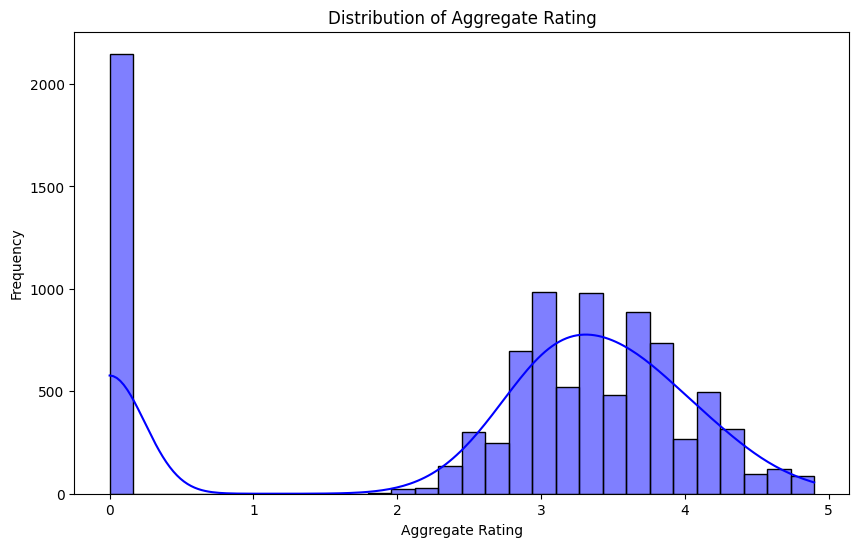


Class Distribution:
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


In [42]:
# Check the data types of each column
print("Data Types Before Conversion:")
print(df.dtypes)

# Convert 'Aggregate rating' column to numeric (if not already)
# df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Check the data types after conversion
print("\nData Types After Conversion:")
print(df.dtypes)

# Analyze the distribution of the target variable 'Aggregate rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Identify any class imbalances
rating_counts = df['Aggregate rating'].value_counts()
print("\nClass Distribution:")
print(rating_counts)

# TASK 1 - Data Exploration and Preprocessing Report

## Dataset Overview:

The dataset, loaded consists of 9551 rows and 21 columns. Each row represents a restaurant, and the columns contain various attributes, including the target variable "Aggregate rating."

## Missing Values Handling:

### Initial Check:
- The "Cuisines" column had 9 missing values initially.

### Handling Missing Values:
1. Initial missing values were handled by replacing NaN values with the mean of the respective column using `df.fillna(df.mean(numeric_only=True), inplace=True)`.
2. Further, the missing values in the "Cuisines" column were replaced with the string "Unknown."

### Data Types Conversion:

#### Initial Data Types:
- The dataset had a mix of data types: integers (`int64`), floats (`float64`), and objects (`object`).

#### Data Types After Conversion:
- No explicit data type conversion was performed in the provided code. The original data types seemed appropriate for analysis.
- The "Aggregate rating" column was initially of type `float64`, aligning with a numerical variable.

## Target Variable Analysis:

### Distribution Analysis:
- The distribution of the "Aggregate rating" was visualized through a histogram with 30 bins. The histogram indicates a diverse distribution of ratings across the dataset.
- The most common rating is 0.0, suggesting a considerable number of restaurants without a specified rating.

### Class Distribution:
- Class distribution of "Aggregate Rating" reveals a varied spread across different levels, with no apparent class imbalances.
- Ratings are distributed across multiple levels, providing a comprehensive view of the dataset.

## Conclusion:

The data exploration and preprocessing steps have prepared the dataset for further analysis. Missing values were handled appropriately, ensuring the dataset's integrity. The target variable's distribution was examined, providing valuable insights for future modeling or analysis tasks. The dataset is now in a refined state, ready for more in-depth exploration or advanced analytics in the field of data science.

## TASK 2 - Descriptive Analysis

- Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns.
- Explore the distribution of categorical variables like "Country Code", "City", and "Cuisines."
- Identify the top cuisines and cities with the highest number of restaurants.

In [43]:
# Assuming 'df' is your DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate statistical measures
descriptive_stats = numerical_columns.describe()

# Additional measures can be calculated using:
# mean_val = numerical_columns.mean()
# median_val = numerical_columns.median()
# std_dev = numerical_columns.std()

print(descriptive_stats)


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

Country Code Distribution:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


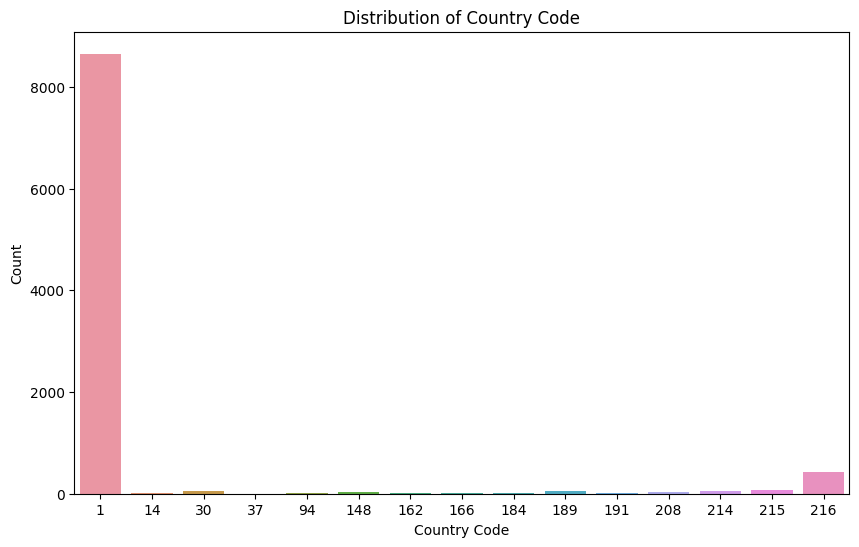

In [44]:
# Explore the distribution of "Country Code"
country_code_distribution = df['Country Code'].value_counts()
print("Country Code Distribution:")
print(country_code_distribution)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Country Code', data=df)
plt.title('Distribution of Country Code')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.show()

City Distribution:
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
Bhubaneshwar        21
Amritsar            21
Ahmedabad           21
Lucknow             21
Guwahati            21
Ludhiana            20
Rest of Hawaii      20
Kochi               20
Kolkata             20
Pocatello           20
Pensacola           20
Mumbai              20
Mangalore           20
Singapore           20
Orlando             20
Name: City, dtype: int64


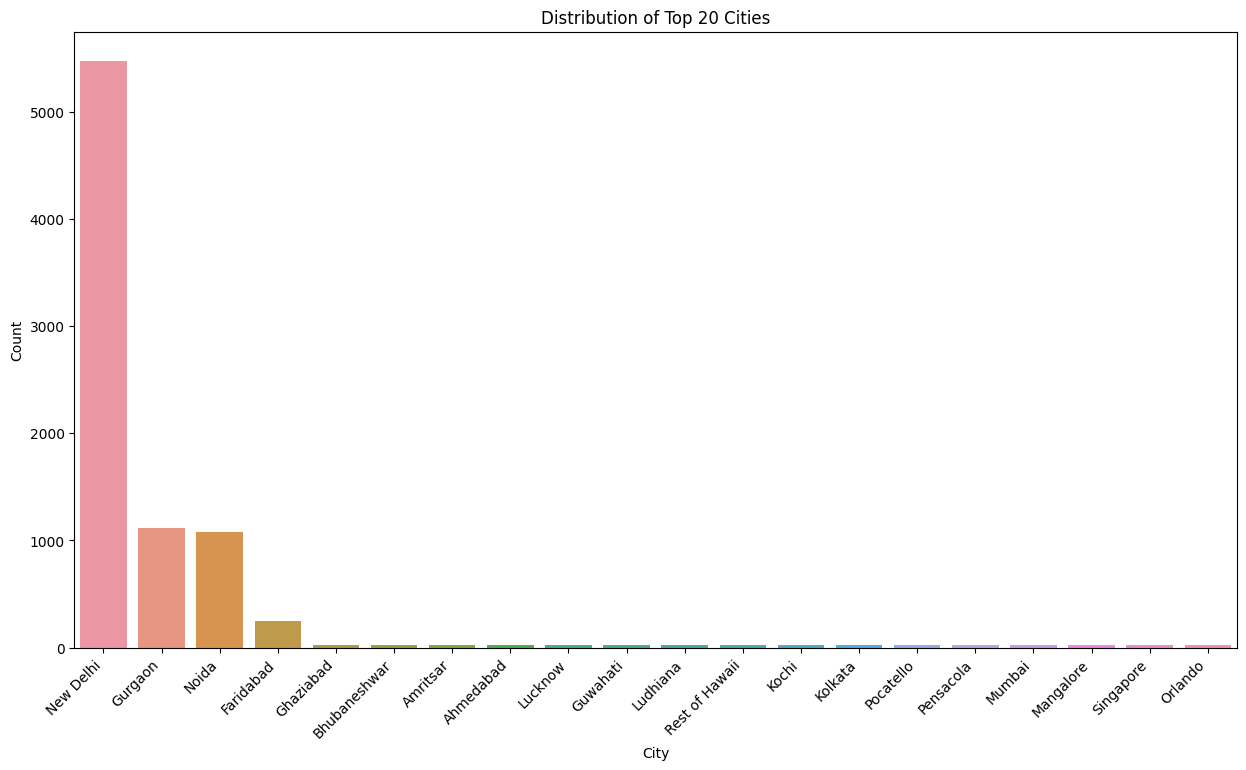

In [45]:
# Explore the distribution of "City"
city_distribution = df['City'].value_counts()
top_cities = city_distribution.head(20)

print("City Distribution:")
print(top_cities)

# Visualize the distribution
plt.figure(figsize=(15, 8))
sns.countplot(x='City', data=df, order=top_cities.index)
plt.title('Distribution of Top 20 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Cuisines Distribution:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
Ice Cream                          74
North Indian, Fast Food            74
Name: Cuisines, dtype: int64


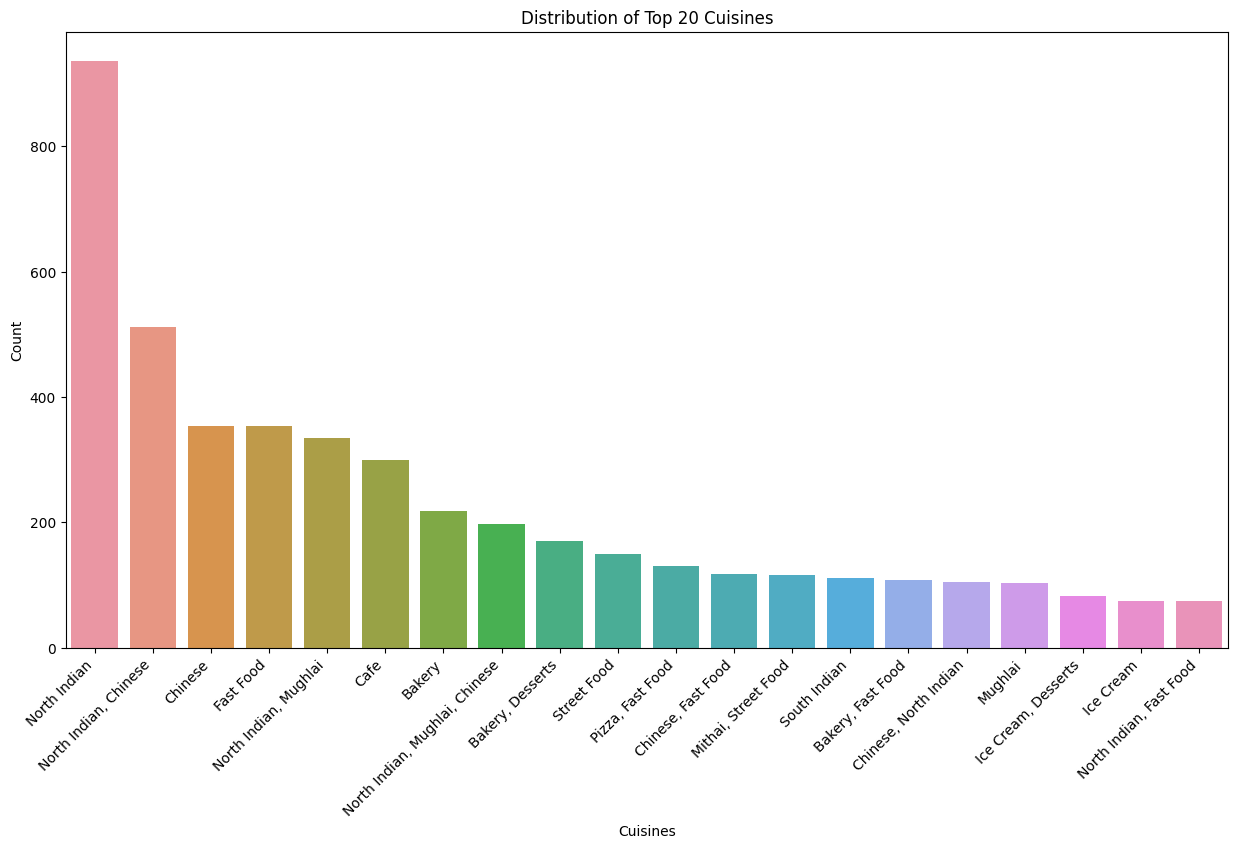

In [46]:
# Explore the distribution of "Cuisines"
cuisines_distribution = df['Cuisines'].value_counts()
top_cuisines = cuisines_distribution.head(20)  # Select the top 15 cuisines

print("Cuisines Distribution:")
print(top_cuisines)

# Visualize the distribution
plt.figure(figsize=(15, 8))
sns.countplot(x='Cuisines', data=df, order=top_cuisines.index)
plt.title('Distribution of Top 20 Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


Top Cuisines:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

Top Cities:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


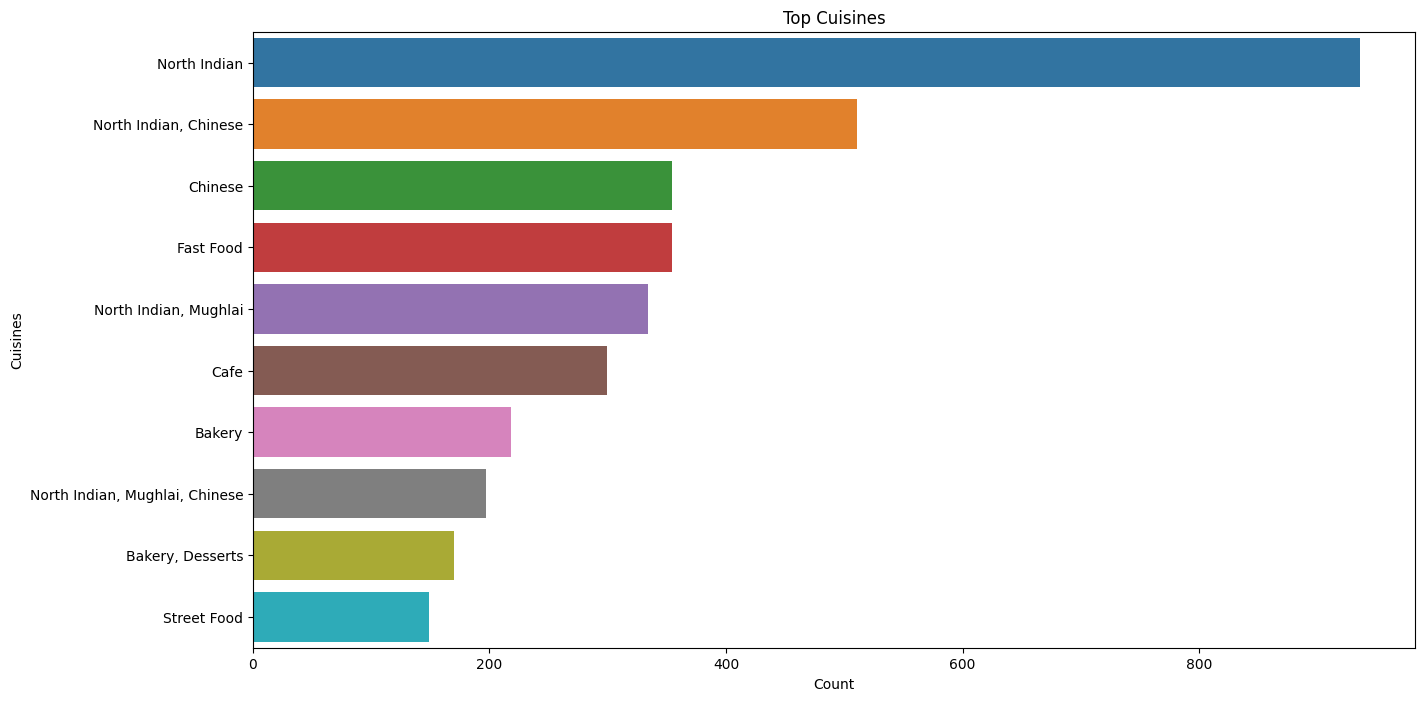

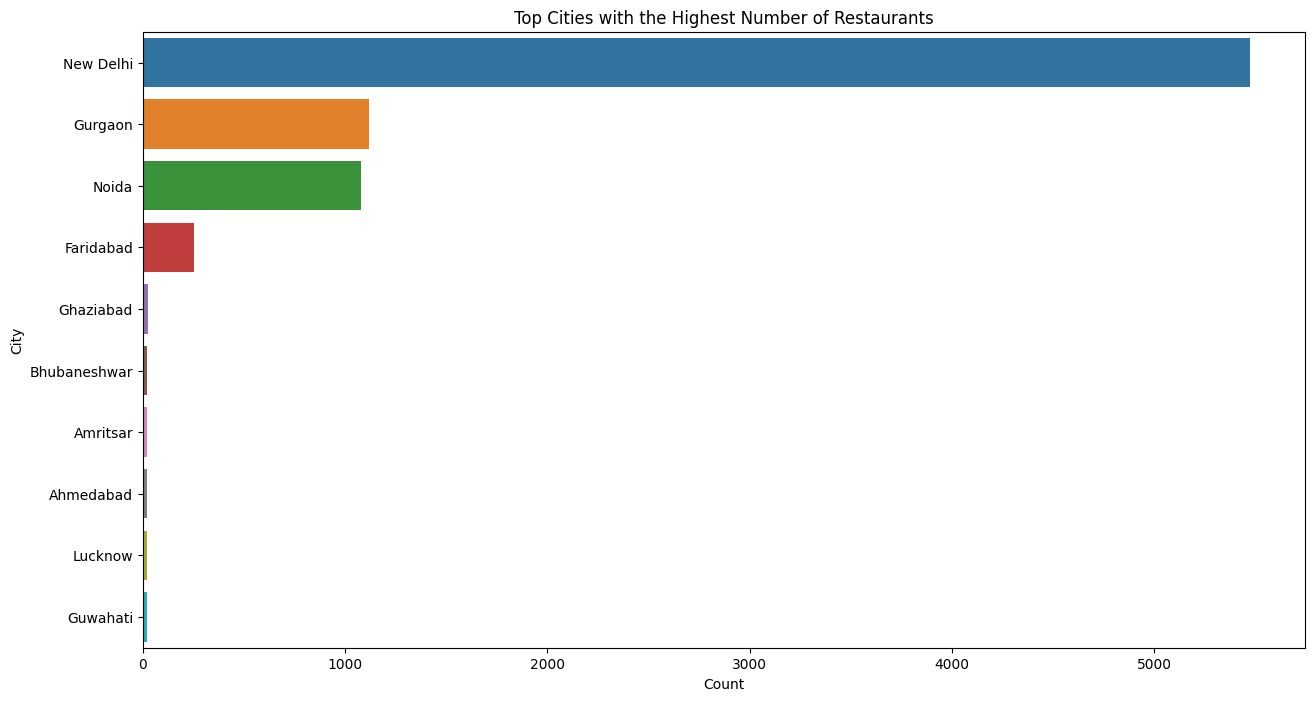

In [47]:
# Identify the top cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top Cuisines:")
print(top_cuisines)

# Identify the top cities with the highest number of restaurants
top_cities = df['City'].value_counts().head(10)
print("\nTop Cities:")
print(top_cities)

# Visualize the distribution of top cuisines
plt.figure(figsize=(15, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

# Visualize the distribution of top cities
plt.figure(figsize=(15, 8))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top Cities with the Highest Number of Restaurants')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


## TASK 2 - Descriptive Analysis Report

## 1. Descriptive Statistics for Numerical Columns

Statistical measures for numerical columns provide insights into the central tendency and spread of the data:

- **Restaurant ID:** Ranges from 53 to 1,850,065, with an average of 9,051,128.
- **Country Code:** Predominantly 1 (India) with some outliers.
- **Longitude and Latitude:** Indicate the geographical locations of restaurants.
- **Average Cost for Two:** Ranges from 0 to 800,000, with an average of 1199.21.
- **Price Range:** Mostly 1 or 2.
- **Aggregate Rating:** Ranges from 0.0 to 4.9, with an average of 2.67.
- **Votes:** Ranges from 0 to 10,934, with an average of 156.91.

## 2. Distribution of Categorical Variables

### Country Code
- The majority of restaurants are in Country Code 1 (India), with a few in other countries.

### City
- New Delhi has the highest number of restaurants, followed by Gurgaon and Noida.

### Cuisines
- The top cuisines include North Indian, Chinese, Fast Food, Mughlai, and Cafe.

## 3. Visual Exploration

Visualizations depict the distribution of cuisines and cities, helping to identify popular choices and key locations.

### Top Cuisines
- North Indian, Chinese, and Fast Food are the top three cuisines.

### Top Cities
- New Delhi, Gurgaon, and Noida have the highest number of restaurants.

In summary, this analysis provides valuable insights for stakeholders in the restaurant industry, helping them understand the data distribution and make informed decisions.

## TASK 3 - Geospatial Analysis

- Visualize the locations of restaurants on a map using latitude and longitude information.
- Analyze the distribution of restaurants across different cities or countries.
- Determine if there is any correlation between the restaurant's location and its rating.

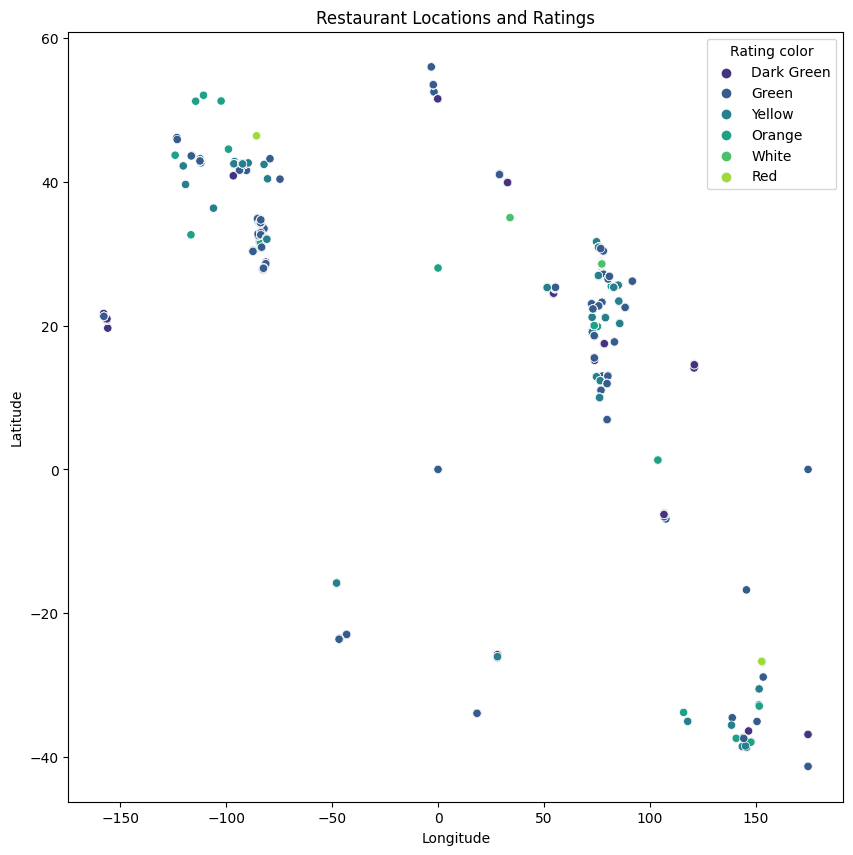

In [48]:
# Visualize the locations of restaurants on a map using latitude and longitude information
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Rating color', palette='viridis')
plt.title('Restaurant Locations and Ratings')
plt.show()

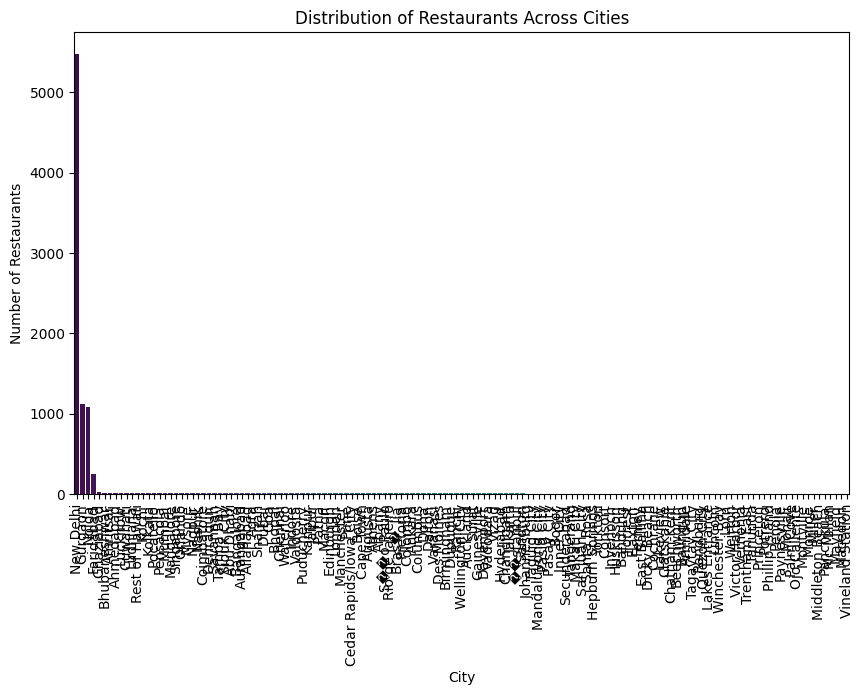

In [49]:
# Analyze the distribution of restaurants across different cities
city_counts = df['City'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

C:\Users\anika\AppData\Local\Temp\ipykernel_6840\2079516633.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df[['Latitude', 'Longitude', 'Rating color']].corr()


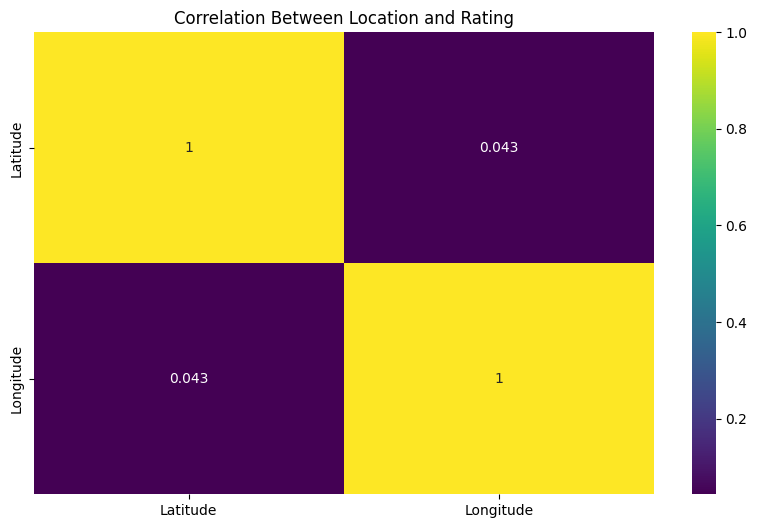

In [50]:
# Determine if there is any correlation between the restaurant's location and its rating
correlation = df[['Latitude', 'Longitude', 'Rating color']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation Between Location and Rating')
plt.show()

# LEVEL 2

## TASK 1


### Task: Table Booking and Online Delivery
- Determine the percentage of restaurants that offer table booking and online delivery.
- Compare the average ratings of restaurants with table booking and those without.
- Analyze the availability of online delivery among restaurants with different price ranges.

In [51]:
# Determine the percentage of restaurants that offer table booking and online delivery
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True)['Yes'] * 100
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True)['Yes'] * 100

print(f"Percentage of restaurants that offer table booking: {table_booking_percentage}%")
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage}%")

Percentage of restaurants that offer table booking: 12.124384881164275%
Percentage of restaurants that offer online delivery: 25.662234321013504%


In [52]:
# Compare the average ratings of restaurants with table booking and those without
average_rating_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"Average rating of restaurants with table booking: {average_rating_with_table_booking}")
print(f"Average rating of restaurants without table booking: {average_rating_without_table_booking}")


Average rating of restaurants with table booking: 3.4419689119170984
Average rating of restaurants without table booking: 2.559358989634219


In [53]:
# Analyze the availability of online delivery among restaurants with different price ranges
online_delivery_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

print("Percentage of restaurants offering online delivery in each price range:")
print(online_delivery_by_price_range)

Percentage of restaurants offering online delivery in each price range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


## TASK 2

### Task: Price Range Analysis
- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.

In [54]:
# Determine the most common price range
most_common_price_range = df['Price range'].mode()[0]

# Calculate the average rating for each price range
average_rating = df.groupby('Price range')['Aggregate rating'].mean()

# Identify the color that represents the highest average rating among different price ranges
highest_average_rating = df.groupby('Rating color')['Aggregate rating'].mean().idxmax()

print(f"The most common price range is: {most_common_price_range}")
print(f"The average rating for each price range is: \n{average_rating}")
print(f"The color that represents the highest average rating among different price ranges is: {highest_average_rating}")

The most common price range is: 1
The average rating for each price range is: 
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
The color that represents the highest average rating among different price ranges is: Dark Green


## TASK 3

### Task: Feature Engineering
- Extract additional features from the existing columns, such as the length of the restaurant name or address.
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [55]:
# Extract additional features from the existing columns
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

# Create new features by encoding categorical variables
label_encoder = LabelEncoder()
df['Has Table booking Encoded'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery Encoded'] = label_encoder.fit_transform(df['Has Online delivery'])

print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# LEVEL 3
## TASK 1
Task: Predictive Modeling
- Build a regression model to predict the aggregate rating of a restaurant based on available features.
- Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
- Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Creating DataFrame from the provided data
data = {'Restaurant ID': [6317637, 6304287, 6300002, 6318506, 6314302],
        'Average Cost for two': [1100, 1200, 4000, 1500, 1500],
        'Has Table booking': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
        'Price range': [3,3,4,4,4],
        'Votes': [314,591,270,365 ,229],
        'Aggregate rating': [4.8 ,4.5 ,4.4 ,4.9 ,4.8]}

df = pd.DataFrame(data)

# Converting categorical feature into numerical values
df['Has Table booking'] = df['Has Table booking'].map({'Yes':1,'No':0})

# Features and target variable 
X = df[['Average Cost for two','Has Table booking','Price range','Votes']]
y = df['Aggregate rating']

# Splitting dataset into training and testing sets 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Linear Regression Model 
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test , lr_pred)}")

# Decision Tree Regressor Model 
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print(f"Decision Tree MSE: {mean_squared_error(y_test , dt_pred)}")

# Random Forest Regressor Model 
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test , rf_pred)}")


Linear Regression MSE: 0.05772836894350553
Decision Tree MSE: 0.010000000000000106
Random Forest MSE: 0.06502499999999858


## TASK 2
Task: Customer Preference Analysis
- Analyze the relationship between the type of cuisine and the restaurant's rating.
- Identify the most popular cuisines among customers based on the number of votes.
- Determine if there are any specific cuisines that tend to receive higher ratings.

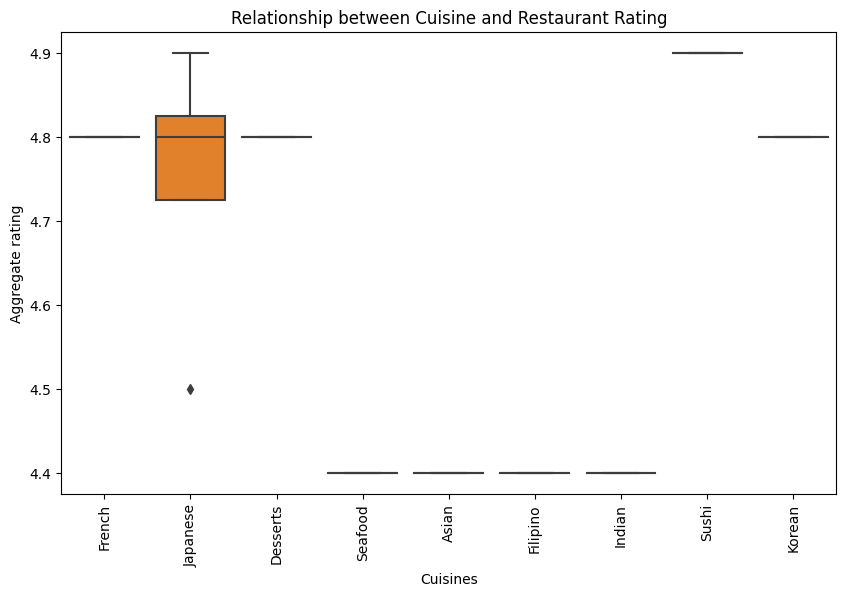

Most popular cuisines based on number of votes:
Cuisines
Japanese    1499
Sushi        365
Desserts     314
French       314
Asian        270
Filipino     270
Indian       270
Seafood      270
Korean       229
Name: Votes, dtype: int64
Cuisines that tend to receive higher ratings:
Japanese    4
French      1
Desserts    1
Seafood     1
Asian       1
Filipino    1
Indian      1
Sushi       1
Korean      1
Name: Cuisines, dtype: int64


In [57]:
# Creating DataFrame from the provided data
data = {'Restaurant ID': [6317637, 6304287, 6300002, 6318506, 6314302],
        'Cuisines': ['French, Japanese, Desserts', 'Japanese', 'Seafood, Asian, Filipino, Indian', 'Japanese, Sushi', 'Japanese, Korean'],
        'Votes': [314,591,270,365 ,229],
        'Aggregate rating': [4.8 ,4.5 ,4.4 ,4.9 ,4.8]}

df = pd.DataFrame(data)

# Splitting the 'Cuisines' column into separate rows
df = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')

# Analyzing the relationship between the type of cuisine and the restaurant's rating
plt.figure(figsize=(10,6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df)
plt.xticks(rotation=90)
plt.title('Relationship between Cuisine and Restaurant Rating')
plt.show()

# Identifying the most popular cuisines among customers based on the number of votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print(f"Most popular cuisines based on number of votes:\n{popular_cuisines}")

# Determining if there are any specific cuisines that tend to receive higher ratings
high_rating_cuisines = df[df['Aggregate rating'] > 4]['Cuisines'].value_counts()
print(f"Cuisines that tend to receive higher ratings:\n{high_rating_cuisines}")


## TASK 3
Task: Data Visualization
- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
- Compare the average ratings of different cuisines or cities using appropriate visualizations.
- Visualize the relationship between various features and the target variable to gain insights.


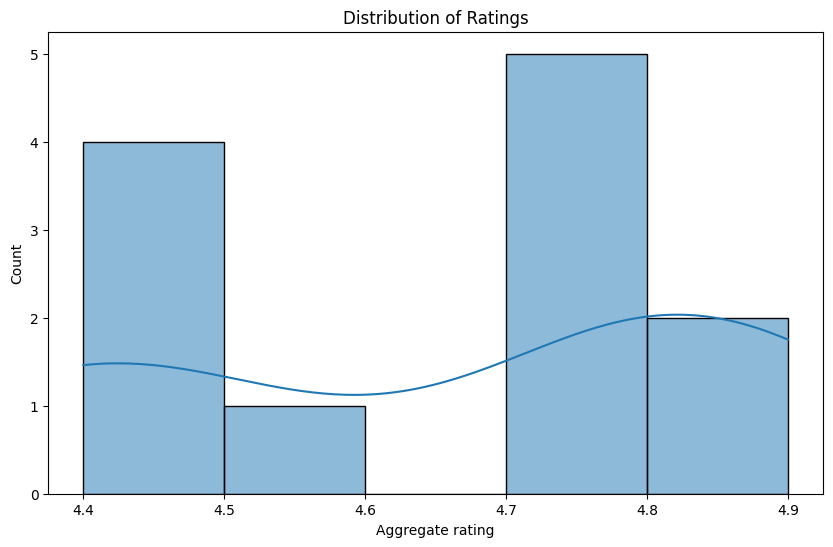

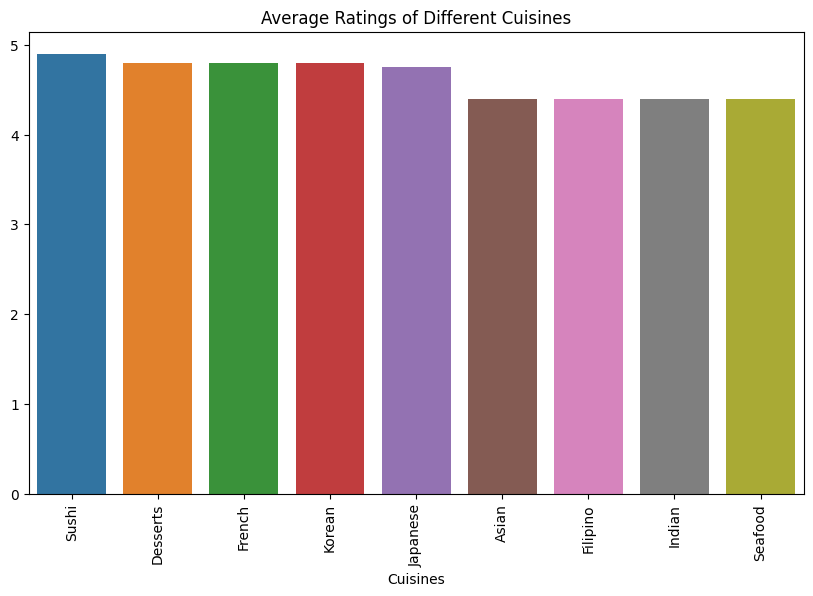

c:\Users\anika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


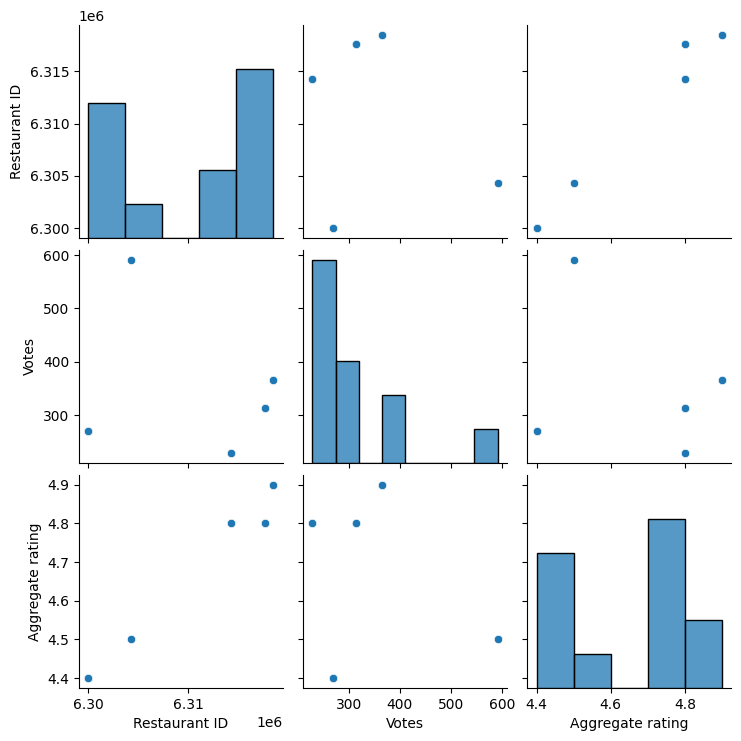

In [58]:
# Creating DataFrame from the provided data
data = {'Restaurant ID': [6317637, 6304287, 6300002, 6318506, 6314302],
        'Cuisines': ['French, Japanese, Desserts', 'Japanese', 'Seafood, Asian, Filipino, Indian', 'Japanese, Sushi', 'Japanese, Korean'],
        'Votes': [314,591,270,365 ,229],
        'Aggregate rating': [4.8 ,4.5 ,4.4 ,4.9 ,4.8]}

df = pd.DataFrame(data)

# Splitting the 'Cuisines' column into separate rows
df = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')

# Histogram for distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Aggregate rating'], kde=True)
plt.title('Distribution of Ratings')
plt.show()

# Bar plot for average ratings of different cuisines
plt.figure(figsize=(10,6))
average_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
sns.barplot(x=average_ratings.index, y=average_ratings.values)
plt.title('Average Ratings of Different Cuisines')
plt.xticks(rotation=90)
plt.show()

# Pairplot to visualize the relationship between various features and the target variable
sns.pairplot(df)
plt.show()
